In [1]:
pip install yfinance

In [2]:
import yfinance as yf
df= yf.download("BTC-USD");

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-05-16,66256.109375,66712.429688,64613.054688,65231.582031,65231.582031,31573077994
2024-05-17,65231.296875,67459.460938,65119.316406,67051.875000,67051.875000,28031279310
2024-05-18,67066.210938,67387.328125,66663.500000,66940.804688,66940.804688,16712277406


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

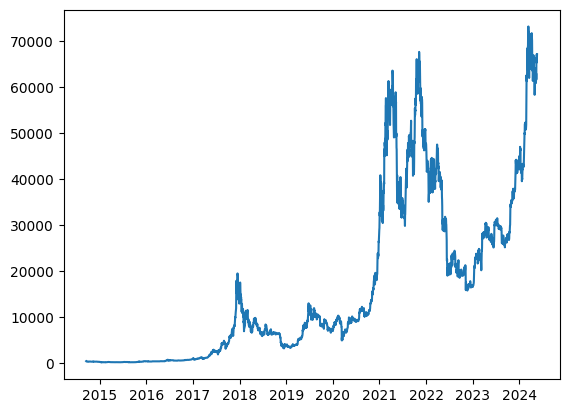

In [55]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [56]:
#train test split 95%
rows = int(len(df) *0.9)
training_data = list(df[0:rows]["Adj Close"])
test_data =  list(df[rows:]["Adj Close"])

len(training_data)




3180

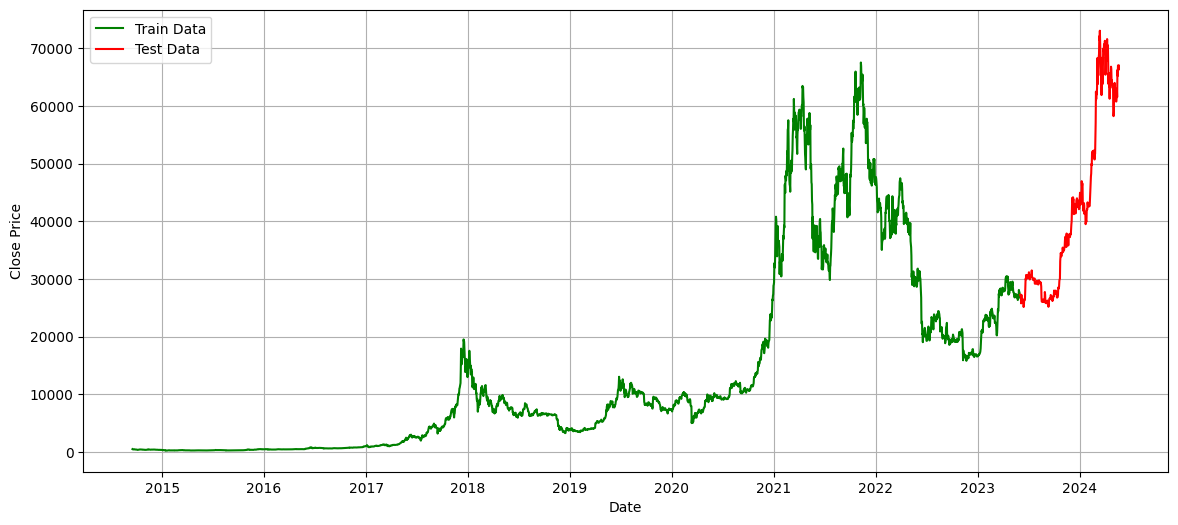

In [57]:
plt.figure(figsize=(14,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(df[0:rows]["Adj Close"],"green",label="Train Data")
plt.plot(df[rows:]["Adj Close"],"Red",label="Test Data")
plt.legend()

In [58]:
model_predictions = []
number_test_observation = len(test_data)


In [63]:
for i in range(number_test_observation):
  #model = sm.tsa.arima.ARIMA(training_data, order= (4,1,0))
  model = ARIMA(training_data, order= (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat);

  actual_test_value = test_data[i]

  training_data.append(actual_test_value)

  #print(output)
  #break

In [64]:
output

array([66325.7198792])

In [66]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3533
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -28827.646
Date:                Mon, 20 May 2024   AIC                          57665.291
Time:                        15:02:08   BIC                          57696.139
Sample:                             0   HQIC                         57676.296
                               - 3533                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0524      0.008     -6.373      0.000      -0.069      -0.036
ar.L2          0.0134      0.009      1.541      0.123      -0.004       0.030
ar.L3          0.0303      0.009      3.226      0.0

In [69]:
len(test_data)

354

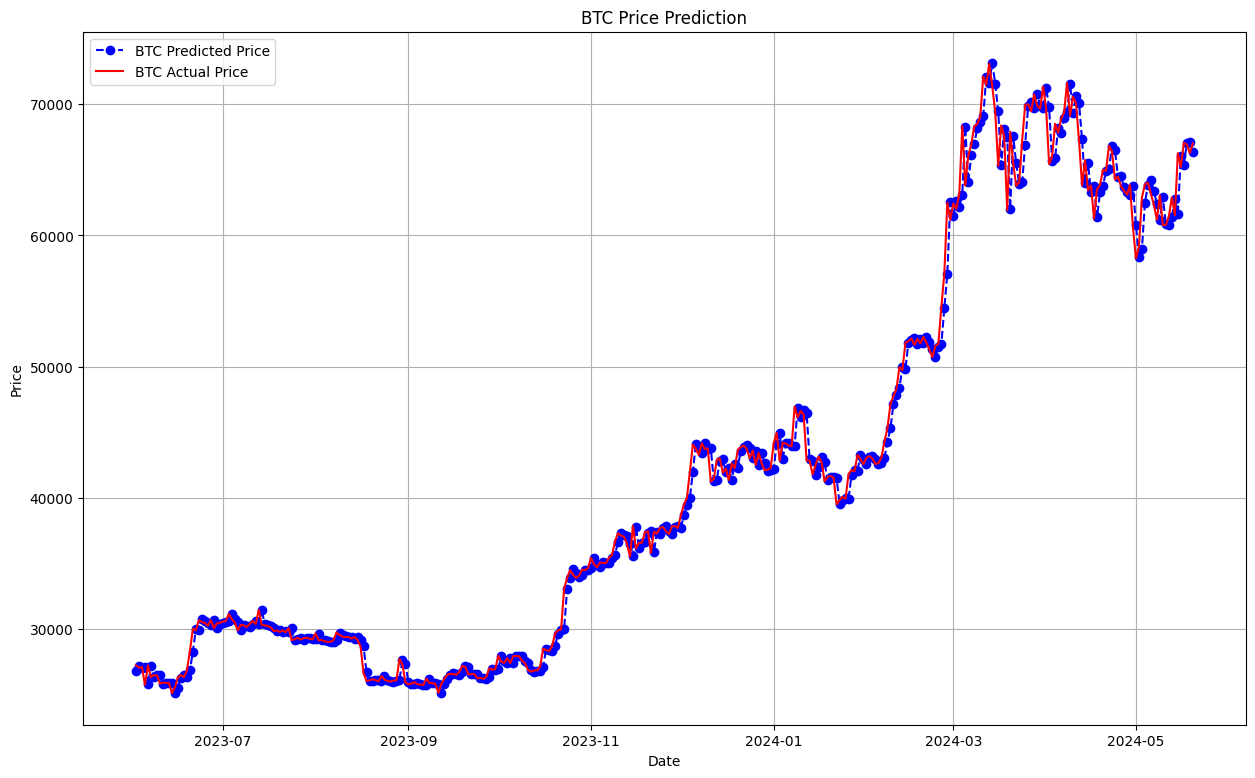

In [70]:
#Visualize output prediction model
plt.figure(figsize=(15,9))
plt.grid(True)
date_range = df[rows:].index

plt.plot(date_range,model_predictions,color="blue",marker='o',linestyle="dashed",label="BTC Predicted Price")
plt.plot(date_range,test_data,color="Red",label="BTC Actual Price")
plt.title("BTC Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [76]:
#model performance
mape = np.mean(np.abs(np.array(model_predictions)-np.array(test_data))/np.abs(test_data)) * 100
print("Model Error %: " + str(mape))
print("Model Accuracy %: "+str(100 - mape))

Model Error %: 1.6990724727091056
Model Accuracy %: 98.3009275272909
